In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import matplotlib.pyplot as plt

In [8]:
GOOGL = yf.Ticker('GOOGL')
df = GOOGL.history(start='2004-08-19',proxy="127.0.0.1:6152")
df.drop(columns=['Dividends','Stock Splits'],inplace=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,9188602
...,...,...,...,...,...
2022-05-24,2115.439941,2129.169922,2037.689941,2119.399902,3839000
2022-05-25,2099.709961,2130.000000,2077.129883,2116.100098,2012900
2022-05-26,2113.540039,2172.989990,2104.500000,2155.850098,1897400


In [3]:
def create_dataset(data, time_steps):
    dataX, dataY = [], []
    for i in range(len(data) - time_steps):
        a = data[i:(i + time_steps), 0]
        dataX.append(a)
        dataY.append(data[i + time_steps, 0])
    return np.array(dataX), np.array(dataY)

In [4]:
data=np.array(df['Close']).reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(data)
data

array([[5.60505340e-05],
       [1.40975825e-03],
       [1.59489447e-03],
       ...,
       [9.50229352e-01],
       [9.46380969e-01],
       [9.26894890e-01]])

In [5]:
train_size = int(len(data)*0.9)
test_size = len(data)-train_size
train, test = data[0:train_size,:], data[train_size:,:]
train.shape, test.shape

((3992, 1), (444, 1))

In [12]:
time_steps = 10
X_train, y_train = create_dataset(train, time_steps)
X_test, y_test = create_dataset(test, time_steps)
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_train.shape[1],1))

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [14]:
# params = (hidden size × (hidden size + x_dim) + hidden size) × 4
# hidden size = 128
# x_dim = 1

model = Sequential()
model.add(LSTM(128, input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)
score = model.evaluate(X_train, y_train, batch_size=64, verbose=1)

Epoch 1/100
63/63 [==============================] - 1s 7ms/step - loss: 0.0040 - accuracy: 2.5113e-04
Epoch 2/100
63/63 [==============================] - 0s 7ms/step - loss: 5.5761e-05 - accuracy: 2.5113e-04
Epoch 3/100
63/63 [==============================] - 0s 7ms/step - loss: 5.2824e-05 - accuracy: 2.5113e-04
Epoch 4/100
63/63 [==============================] - 0s 7ms/step - loss: 5.0239e-05 - accuracy: 2.5113e-04
Epoch 5/100
63/63 [==============================] - 0s 7ms/step - loss: 4.7769e-05 - accuracy: 2.5113e-04
Epoch 6/100
63/63 [==============================] - 0s 7ms/step - loss: 4.7420e-05 - accuracy: 2.5113e-04
Epoch 7/100
63/63 [==============================] - 0s 7ms/step - loss: 4.8364e-05 - accuracy: 2.5113e-04
Epoch 8/100
63/63 [==============================] - 0s 7ms/step - loss: 4.9179e-05 - accuracy: 2.5113e-04
Epoch 9/100
63/63 [==============================] - 0s 7ms/step - loss: 4.6941e-05 - accuracy: 2.5113e-04
Epoch 10/100
63/63 [=====================

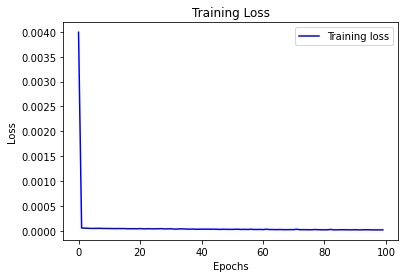

In [16]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

visualize_loss(history, "Training Loss")


In [17]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])

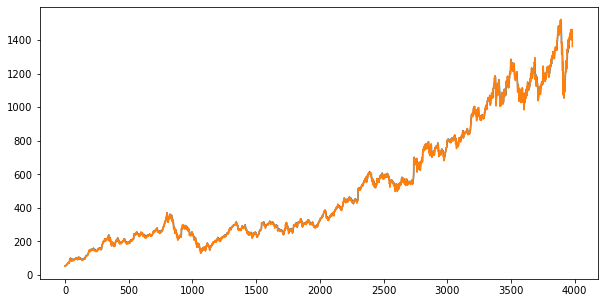

In [18]:
plt.figure(figsize=(10,5))
trainY=trainY.reshape(-1,1)
plt.plot(trainPredict)
plt.plot(trainY)

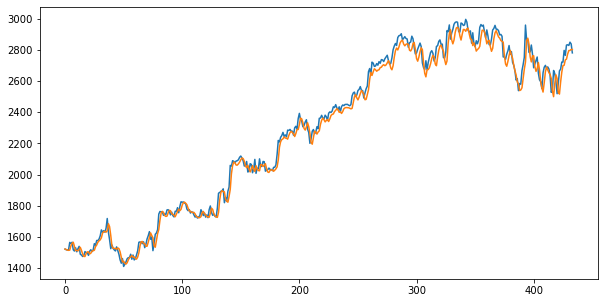

In [19]:
plt.figure(figsize=(10,5))
testY=testY.reshape(-1,1)
plt.plot(testY)
plt.plot(testPredict)